# Processing CMRSET AET

### Converting GeoTIFF to netcdf

In [2]:
import glob
import xarray as xr
import numpy as np
import rioxarray

In [3]:
#geotiff_file = '/g/data/w97/ad9701/CMRSET_AET/ETa_mosaic_clip.tif'

geotiff_file_list = glob.glob('/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/CMRSET_LANDSAT_v2_2_201*.tif')

var = 'ETa'

for geotiff_file in geotiff_file_list:
    geotiff_da = rioxarray.open_rasterio(geotiff_file)
    geotiff_ds = geotiff_da.to_dataset('band')
    geotiff_ds = geotiff_ds.rename({1: var})
    
    # check that the dataset contains only positive values
    da_temp = geotiff_ds[var].where(geotiff_ds[var] < 0)
    print(geotiff_file)
    print(np.unique(da_temp.values))
    del da_temp
    
    # set -9999 to np.nan. Assuming that there are no other values less than zero
    geotiff_ds[var] = geotiff_ds[var].where(geotiff_ds[var] > 0)
    geotiff_ds[var].encoding['zlib'] = True
    geotiff_ds[var].encoding['complevel'] = 1

    # write output
    ncfile_out = geotiff_file.split('.')[0] + '.nc'
    print(ncfile_out)
    geotiff_ds.to_netcdf(ncfile_out)

/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/CMRSET_LANDSAT_v2_2_2015_12_01_ETa_SEA_dom4_clip.tif
[nan]
/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/CMRSET_LANDSAT_v2_2_2015_12_01_ETa_SEA_dom4_clip.nc
/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/CMRSET_LANDSAT_v2_2_2017_01_01_ETa_SEA_dom4_clip.tif
[nan]
/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/CMRSET_LANDSAT_v2_2_2017_01_01_ETa_SEA_dom4_clip.nc
/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/CMRSET_LANDSAT_v2_2_2017_02_01_ETa_SEA_dom4_clip.tif
[nan]
/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/CMRSET_LANDSAT_v2_2_2017_02_01_ETa_SEA_dom4_clip.nc
/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/CMRSET_LANDSAT_v2_2_2016_04_01_ETa_SEA_dom4_clip.tif
[nan]
/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/CMRSET_LANDSAT_v2_2_2016_04_01_ETa_SEA_dom4_clip.nc
/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/CMRSET_LANDSAT_v2_2_2017_08_01_ETa_SEA_dom4_clip.tif
[nan]
/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/CMRSET_LANDSAT_v2_2_2017_08_01_ETa_SEA_dom4_clip.nc
/g/da

In [4]:
%%time

# one file did not convert properly. Redoing it

var = 'ETa'
geotiff_file = '/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/CMRSET_LANDSAT_v2_2_2017_05_01_ETa_SEA_dom4_clip.tif'
geotiff_da = rioxarray.open_rasterio(geotiff_file)
geotiff_ds = geotiff_da.to_dataset('band')
geotiff_ds = geotiff_ds.rename({1: var})

# check that the dataset contains only positive values
da_temp = geotiff_ds[var].where(geotiff_ds[var] < 0)
print(geotiff_file)
print(np.unique(da_temp.values))
del da_temp

# set -9999 to np.nan. Assuming that there are no other values less than zero
geotiff_ds[var] = geotiff_ds[var].where(geotiff_ds[var] > 0)
geotiff_ds[var].encoding['zlib'] = True
geotiff_ds[var].encoding['complevel'] = 1

# write output
ncfile_out = geotiff_file.split('.')[0] + '.nc'
print(ncfile_out)
geotiff_ds.to_netcdf(ncfile_out)

/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/CMRSET_LANDSAT_v2_2_2017_05_01_ETa_SEA_dom4_clip.tif
[nan]
/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/CMRSET_LANDSAT_v2_2_2017_05_01_ETa_SEA_dom4_clip.nc
CPU times: user 33.1 s, sys: 5.46 s, total: 38.6 s
Wall time: 41.6 s


In [4]:
ds_1 = xr.open_dataset('/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/CMRSET_LANDSAT_v2_2_2017_05_01_ETa_SEA_dom4_clip.nc')
ds_1

<xarray.Dataset>
Dimensions:      (y: 19439, x: 22371)
Coordinates:
  * x            (x) float64 144.1 144.1 144.1 144.1 ... 150.1 150.1 150.1 150.1
  * y            (y) float64 -33.24 -33.24 -33.24 ... -38.48 -38.48 -38.48
    spatial_ref  int64 ...
Data variables:
    ETa          (y, x) float32 ...
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

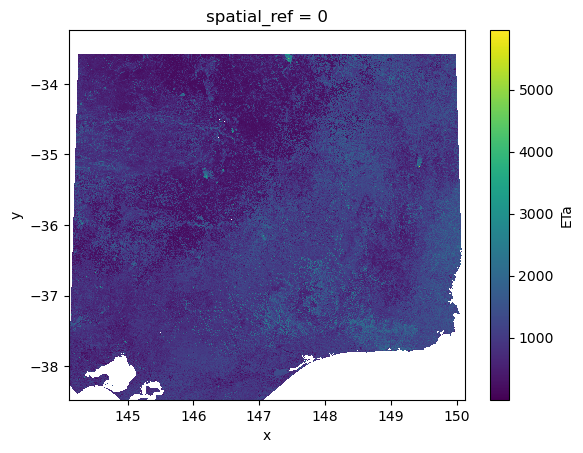

In [5]:
ds_1['ETa'].plot()

In [25]:
# there is a problem with co-ordinates in the 2017-05 file - fixing it

data_dir = '/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/'
file1 = 'CMRSET_LANDSAT_v2_2_2017_04_01_ETa_SEA_dom4_clip.nc'
file2 = 'CMRSET_LANDSAT_v2_2_2017_05_01_ETa_SEA_dom4_clip_befCorr.nc'

ds1 = xr.open_dataset(data_dir + file1)
ds2 = xr.open_dataset(data_dir + file2)

ds3 = ds2.copy(deep = True)
ds3 = ds3.assign_coords({'x': ds1.x.values, 'y': ds1.y.values})

In [27]:
ds3.to_netcdf(data_dir + 'CMRSET_LANDSAT_v2_2_2017_05_01_ETa_SEA_dom4_clip.nc')

### Calculate seasonal mean ETa during 2016-17

In [29]:
! mv /g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/seasonal_data /g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/seasonal_data_toDel

In [30]:
import pandas as pd
import xarray as xr
import numpy as np
import os

in_dir = '/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/'
out_dir = '/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/seasonal_data/'

time_sel_dict = {'2016': slice('2015-12', '2016-11'),
                 '2017': slice('2016-12', '2017-11'),
                 '2016-17': slice('2015-12', '2017-11')}

varname = 'ETa'
nc_fname = sorted(glob.glob(in_dir + 'CMRSET_LANDSAT_v2_2_201*clip.nc'))
ds = xr.open_mfdataset(nc_fname, combine = 'nested', concat_dim = 'time')

start_timestamp = pd.Timestamp('2015-12-01')
dates_series = pd.date_range(start=start_timestamp, periods=25, freq='MS')
dates_array = dates_series.to_numpy()

ds = ds.assign_coords({'time': dates_array}).rename({'x': 'lon', 'y': 'lat'})

for time_key in time_sel_dict.keys():
    time_sel = time_sel_dict[time_key]
    # open data & calculate seasonal mean
    da_seas_mean = ds[varname].sel(time = time_sel).groupby('time.season').mean().load()
    # write output
    if not os.path.exists(out_dir):
        os.makedirs(out_dir) 
    output_file = out_dir + time_key + '_' + varname + '_mean.nc'
    print(output_file)
    da_seas_mean.to_netcdf(output_file)

/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/seasonal_data/2016_ETa_mean.nc
/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/seasonal_data/2017_ETa_mean.nc
/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/seasonal_data/2016-17_ETa_mean.nc


### Creating appropriate file for use with ESMF Regrid

In [33]:
import xarray as xr
import numpy as np
import pandas as pd
import os

cmrset_dir = '/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/seasonal_data/'
fname = '2016-17_ETa_mean.nc'

ds_in = xr.open_dataset(cmrset_dir + fname)
ds_in

<xarray.Dataset>
Dimensions:      (lon: 22371, lat: 19439, season: 4)
Coordinates:
  * lon          (lon) float64 144.1 144.1 144.1 144.1 ... 150.1 150.1 150.1
  * lat          (lat) float64 -33.24 -33.24 -33.24 ... -38.48 -38.48 -38.48
    spatial_ref  int64 ...
  * season       (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    ETa          (season, lat, lon) float32 ...

In [10]:
ds_in.lat.values

array([-38.47587668, -38.47587668, -38.47560719, ..., -33.23771043,
       -33.23744093, -33.23744093])

In [8]:
import xarray as xr
import numpy as np
import pandas as pd
import os

cmrset_dir = '/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/seasonal_data_old/'
fname = '2016-17_ETa_mean.nc'

ds_in = xr.open_dataset(cmrset_dir + fname)
ds_in

<xarray.Dataset>
Dimensions:      (lon: 22371, lat: 19439, season: 4)
Coordinates:
  * lon          (lon) float64 144.1 144.1 144.1 144.1 ... 150.1 150.1 150.1
  * lat          (lat) float64 -33.24 -33.24 -33.24 ... -38.48 -38.48 -38.48
    spatial_ref  int64 ...
  * season       (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    ETa          (season, lat, lon) float32 ...

In [5]:
! ls /g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/

CMRSET_LANDSAT_v2_2_2015_12_01_ETa_SEA_dom4_clip.nc
CMRSET_LANDSAT_v2_2_2015_12_01_ETa_SEA_dom4_clip.tif
CMRSET_LANDSAT_v2_2_2016_01_01_ETa_SEA_dom4_clip.nc
CMRSET_LANDSAT_v2_2_2016_01_01_ETa_SEA_dom4_clip.tif
CMRSET_LANDSAT_v2_2_2016_02_01_ETa_SEA_dom4_clip.nc
CMRSET_LANDSAT_v2_2_2016_02_01_ETa_SEA_dom4_clip.tif
CMRSET_LANDSAT_v2_2_2016_03_01_ETa_SEA_dom4_clip.nc
CMRSET_LANDSAT_v2_2_2016_03_01_ETa_SEA_dom4_clip.tif
CMRSET_LANDSAT_v2_2_2016_04_01_ETa_SEA_dom4_clip.nc
CMRSET_LANDSAT_v2_2_2016_04_01_ETa_SEA_dom4_clip.tif
CMRSET_LANDSAT_v2_2_2016_05_01_ETa_SEA_dom4_clip.nc
CMRSET_LANDSAT_v2_2_2016_05_01_ETa_SEA_dom4_clip.tif
CMRSET_LANDSAT_v2_2_2016_06_01_ETa_SEA_dom4_clip.nc
CMRSET_LANDSAT_v2_2_2016_06_01_ETa_SEA_dom4_clip.tif
CMRSET_LANDSAT_v2_2_2016_07_01_ETa_SEA_dom4_clip.nc
CMRSET_LANDSAT_v2_2_2016_07_01_ETa_SEA_dom4_clip.tif
CMRSET_LANDSAT_v2_2_2016_08_01_ETa_SEA_dom4_clip.nc
CMRSET_LANDSAT_v2_2_2016_08_01_ETa_SEA_dom4_clip.tif
CMRSET_LANDSAT_v2_2_2016_09_01_ETa_SEA_dom4_clip.nc
CMR

In [6]:
import xarray as xr
import numpy as np
import pandas as pd
import os

cmrset_dir = '/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/seasonal_data_old/'
fname = '2016-17_ETa_mean.nc'

ds_in = xr.open_dataset(cmrset_dir + fname)
ds_in

<xarray.Dataset>
Dimensions:      (lon: 22371, lat: 19439, season: 4)
Coordinates:
  * lon          (lon) float64 144.1 144.1 144.1 144.1 ... 150.1 150.1 150.1
  * lat          (lat) float64 -33.24 -33.24 -33.24 ... -38.48 -38.48 -38.48
    spatial_ref  int64 ...
  * season       (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    ETa          (season, lat, lon) float32 ...

In [4]:
ds_in['lat']

<xarray.DataArray 'lat' (lat: 38878)>
array([-38.475877, -38.475877, -38.475607, ..., -33.23771 , -33.237441,
       -33.237441])
Coordinates:
  * lat          (lat) float64 -38.48 -38.48 -38.48 ... -33.24 -33.24 -33.24
    spatial_ref  int64 ...

In [2]:
ds_in['lat']

<xarray.DataArray 'lat' (lat: 19439)>
array([-33.237441, -33.23771 , -33.23798 , ..., -38.475338, -38.475607,
       -38.475877])
Coordinates:
  * lat          (lat) float64 -33.24 -33.24 -33.24 ... -38.48 -38.48 -38.48
    spatial_ref  int64 ...

In [3]:
ds_in['ETa']

<xarray.DataArray 'ETa' (season: 4, lat: 19439, lon: 22371)>
[1739479476 values with dtype=float32]
Coordinates:
  * lon          (lon) float64 144.1 144.1 144.1 144.1 ... 150.1 150.1 150.1
  * lat          (lat) float64 -33.24 -33.24 -33.24 ... -38.48 -38.48 -38.48
    spatial_ref  int64 ...
  * season       (season) object 'DJF' 'JJA' 'MAM' 'SON'